In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
student_data = pd.read_csv('C:\\Users\\Shreyansh jain\\Desktop\\Student-Intervention-master\\student-data.csv')
print ("Student data read successfully!")

Student data read successfully!


In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [4]:
feature_cols = list(student_data.columns[:-1])  
target_col = student_data.columns[-1]  
print("Feature column(s):{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))
x = student_data[feature_cols]  
y_all = student_data[target_col]

Feature column(s):['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


In [5]:
def preprocess_features(X):
    df_preprocess = pd.DataFrame(index=X.index)
    for colname, col_data in X.iteritems():
        if col_data.dtype == object: 
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=colname)
        df_preprocess = df_preprocess.join(col_data)  # collect column(s) in output dataframe
    return df_preprocess
X_all = preprocess_features(x)
print("Processed Feature Columns")
X_all.head()


Processed Feature Columns


,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


In [6]:
y = pd.DataFrame(y_all, index = y_all.index)
y = y.replace(['yes', 'no'], [1, 0])
df_data = pd.concat([X_all, y], axis = 1)
df_data.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1,0,1,0,18,0,1,1,0,1,...,0,0,4,3,4,1,1,3,6,0
1,1,0,1,0,17,0,1,1,0,0,...,1,0,5,3,3,1,1,3,4,0
2,1,0,1,0,15,0,1,0,1,0,...,1,0,4,3,2,2,3,3,10,1
3,1,0,1,0,15,0,1,1,0,0,...,1,1,3,2,2,1,1,5,2,1
4,1,0,1,0,16,0,1,1,0,0,...,0,0,4,3,2,1,2,5,4,1


In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
x = StandardScaler().fit_transform(X_all)

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [10]:
finalDf = pd.concat([principalDf, y_all], axis = 1)
finalDf

,principal component 1,principal component 2,passed
0,-1.175532,-0.886894,no
1,0.596464,-2.620539,no
2,0.994171,-1.088385,yes
3,-3.031464,-1.307627,yes
4,-1.138601,-1.659337,yes
...,...,...,...
390,4.229295,3.250304,no
391,3.677133,3.053276,yes
392,7.634033,-0.110800,no
393,5.140477,1.926799,yes


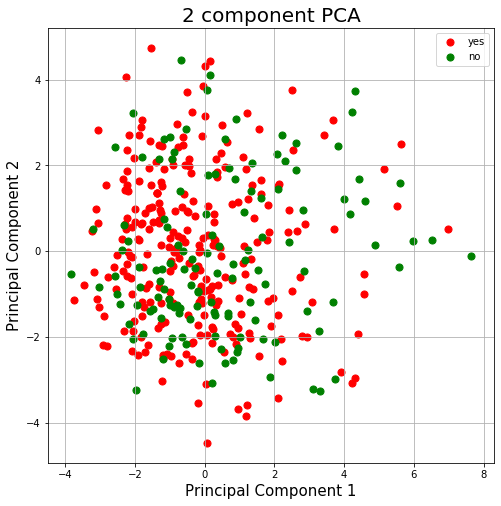

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['passed'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_all,y,test_size=0.40,random_state=0)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(.95)

In [54]:
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [55]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(x_train, y_train) 
preds = regr.predict(x_train)
training_error = mean_absolute_error(y_train, preds)#mean absolute value for test data
#test_data = test[target]
predict_test = regr.predict(x_test)
test_data_error = mean_absolute_error(y_test, predict_test)



In [56]:
accuracy = r2_score(y_train, preds)#on test data
accuracy2 = r2_score(y_test, predict_test)
print('This model accounts for {}% of the training data with mean data error of {}'.format(round(accuracy*100,2), round(training_error,2)))
print('This model accounts for {}% of the testing data with mean data error of {}'.format(round(accuracy2*100,2), round(test_data_error,2)))

This model accounts for 22.7% of the training data with mean data error of 0.33
This model accounts for 7.64% of the testing data with mean data error of 0.38


In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(x_train,y_train)


c:\users\shreyansh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shreyansh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
lr.predict_proba(x_test)

array([[0.32331194, 0.67668806],
       [0.30504617, 0.69495383],
       [0.75931139, 0.24068861],
       [0.36460779, 0.63539221],
       [0.30239809, 0.69760191],
       [0.05838323, 0.94161677],
       [0.53329725, 0.46670275],
       [0.0506921 , 0.9493079 ],
       [0.26716402, 0.73283598],
       [0.05558103, 0.94441897],
       [0.33371743, 0.66628257],
       [0.8922706 , 0.1077294 ],
       [0.10873479, 0.89126521],
       [0.45271311, 0.54728689],
       [0.13129017, 0.86870983],
       [0.04516572, 0.95483428],
       [0.61931241, 0.38068759],
       [0.24231155, 0.75768845],
       [0.06374773, 0.93625227],
       [0.03067185, 0.96932815],
       [0.41810222, 0.58189778],
       [0.95380455, 0.04619545],
       [0.30165587, 0.69834413],
       [0.13402556, 0.86597444],
       [0.12140721, 0.87859279],
       [0.16765836, 0.83234164],
       [0.31824713, 0.68175287],
       [0.14018518, 0.85981482],
       [0.33215168, 0.66784832],
       [0.15123698, 0.84876302],
       [0.

In [59]:
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score
print('Accuracy %.2f' % accuracy_score(y_test,y_pred))


Accuracy 0.65


In [60]:
from sklearn.linear_model import Perceptron


ppn = Perceptron(max_iter=40,eta0=0.1, random_state=0)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)

c:\users\shreyansh jain\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.metrics import accuracy_score

print('Accuracy: %0.2f' % accuracy_score(y_test,y_pred))


Accuracy: 0.66
